# Train Test Split different ratios

Importing Libraries

In [18]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize


# Innitial Plots

In [19]:
#Innitial look at personal data 
#difference between experimental binding energies and Liquid Drop Model Binding Energies
#The Random Forrest is being trained to predict this difference to 'fix' the liquid drop model 

N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)
X = np.transpose(np.stack((N,Z)))

print(X)

print(np.array([[20,20],[20, 22]]))

[[ 14.  20.]
 [ 15.  20.]
 [ 15.  21.]
 ...
 [150.  91.]
 [150.  92.]
 [151.  92.]]
[[20 20]
 [20 22]]


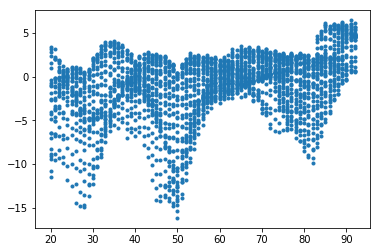

In [20]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

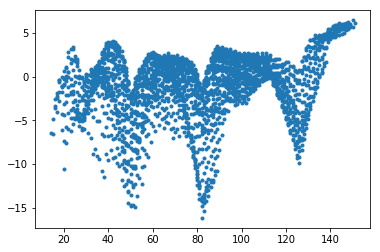

In [21]:
plt.plot(N,y,'o',markersize=3)
plt.show()

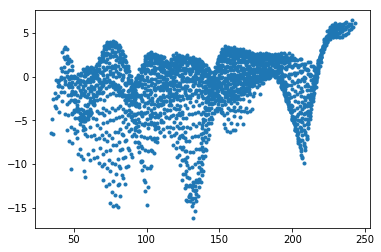

In [22]:
plt.plot(A,y,'o',markersize=3)
plt.show()

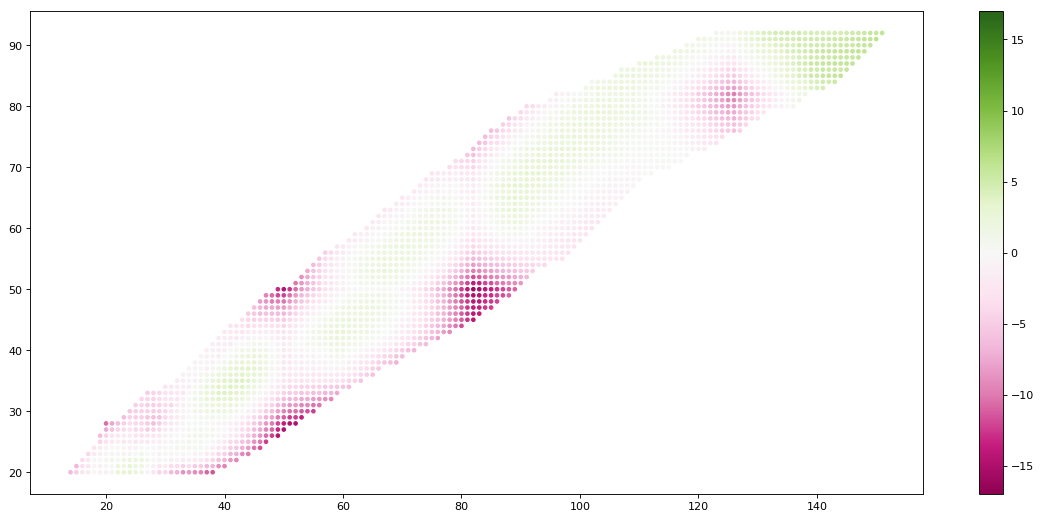

In [23]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

# Changing the train/test data set ratios to see performance change

Looking at the bias of the model by changing the train and test data set ratios.

In [27]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=1000 , random_state=42)

In [28]:
nl_train  =[] #ratios
nl_test   =[]

x_tr      =[] #actual 
x_te      =[]

pred_tr   =[] #predicted
pred_te   =[]

err_tr    =[] #error
err_te    =[]


noerr_tr  =[] #error
noerr_te  =[]

sco_tr    =[] #score
sco_te    =[]

nerr_tr   =[] #mean of error
nerr_te   =[]

sderr_tr  =[] #standard Deviation of error
sderr_te  =[]

derr_tr   =[] #median of error
derr_te   =[]

#loop to see how different train/test ratios effects bias and variance going from test data set of 5% to 95%
for n in range(5, 96, 5):
    
    #Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =n/100, random_state=42 )
    
    #fitting the rf to the training values
    rf.fit(X_train, y_train);
    
    #appending the ratios to the ratio lists
    nl_test.append(n)
    nl_train.append(100-n)
    
    
    
    #appending the ACTUAL values into a list
    x_tr.append(X_train)
    x_te.append(X_test )
    
    ###########
    
    pred_train= rf.predict(X_train)
    pred_test = rf.predict(X_test )
    
    #appending the PREDICTED values of rf into a list
    pred_tr.append(pred_train)
    pred_te.append(pred_test)
    
    ###########
    
    #all error values
    err_train = y_train-pred_train
    err_test  = y_test- pred_test 
    
    #appending the ERROR values to list
    err_tr.append(err_train)
    err_te.append(err_test)
    
    ###########
    
    #appending the SCORES to the scores lists
    sco_tr.append(rf.score(X_train, y_train))
    sco_te.append(rf.score(X_test,  y_test ))
    
    ###########
    
    #appending the MEAN of the error vaues
    nerr_tr.append(np.mean(err_train))
    nerr_te.append(np.mean(err_test ))
    
    ###########
    
    #appending the STANDARD DEVIATION of the error values
    sderr_tr.append(np.std(err_train))
    sderr_te.append(np.std(err_test ))
    
    ###########
    
    #appending the MEDIAN of the error values
    derr_tr.append(np.median(err_train))
    derr_te.append(np.median(err_test ))
    
    
    #Printing all the values:
    
    #ratios
    print('train size: ', 100-n, '%')
    print('test size:  ', n, '%')
    
    #scores
    print('train score: ', round(rf.score(X_train, y_train),5))
    print('test  score: ', round(rf.score(X_test,  y_test ),5))
    
    #mean error
    print('mean error of train:', round(np.mean(err_train),5))
    print('mean error of test: ', round(np.mean(err_test),5))
    
    
    #standard Deviatin of error
    print('Standard Deviation error of train:', round(np.std(err_train),5))
    print('Standard Deviation of test: ', round(np.std(err_test),5))
    
    #median error
    print('median error of train:', round(np.median(err_train),5))
    print('median error of test: ', round(np.median(err_test),5))
    
    """
    #printing histogram of train
    num_bins = 80
    n, bins, patches = plt.hist([err_train, err_test], num_bins, alpha=0.5)
    y = mlab.normpdf(bins, np.mean(err_train), np.std(err_train))
    plt.plot(bins, y, 'r--')
    plt.ylabel('training error')
    plt.xlabel('bins')  
    plt.show()
   
    #printing histogram of train
    num_bins = 80
    n, bins, patches = plt.hist(err_train , num_bins, facecolor='blue', alpha=0.5)
    #y = mlab.normpdf(bins, np.mean(err_test), np.std(err_test))
    #plt.plot(bins, y, 'r--')
    plt.ylabel('testing error')
    plt.xlabel('bins')
    plt.show()
    
    #printing histogram of test
    num_bins = 80
    n, bins, patches = plt.hist(err_test , num_bins, facecolor='blue', alpha=0.5)
    #y = mlab.normpdf(bins, np.mean(err_test), np.std(err_test))
    #plt.plot(bins, y, 'r--')
    plt.ylabel('testing error')
    plt.xlabel('bins')
    plt.show()
    
  
    #printing error of train and test
    plt.plot(np.transpose(X_train)[0]+np.transpose(X_train)[1], err_train, 'o',markersize=1,label='train Error')
    plt.plot(np.transpose(X_test )[0]+np.transpose(X_test )[1], err_test , 'o',markersize=1,label='test  Error')
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('A')
    plt.show()
    """
    print('\n')
    
    

train size:  95 %
test size:   5 %
train score:  0.99831
test  score:  0.98938
mean error of train: -0.00367
mean error of test:  -0.04502
Standard Deviation error of train: 0.15254
Standard Deviation of test:  0.41951
median error of train: 0.00927
median error of test:  0.01932


train size:  90 %
test size:   10 %
train score:  0.99827
test  score:  0.9884
mean error of train: -0.00298
mean error of test:  -0.02872
Standard Deviation error of train: 0.15483
Standard Deviation of test:  0.41301
median error of train: 0.0098
median error of test:  0.02623


train size:  85 %
test size:   15 %
train score:  0.99813
test  score:  0.98801
mean error of train: -0.00371
mean error of test:  -0.00669
Standard Deviation error of train: 0.16023
Standard Deviation of test:  0.42244
median error of train: 0.00972
median error of test:  0.05313


train size:  80 %
test size:   20 %
train score:  0.998
test  score:  0.98433
mean error of train: -0.00416
mean error of test:  -0.02996
Standard Devi

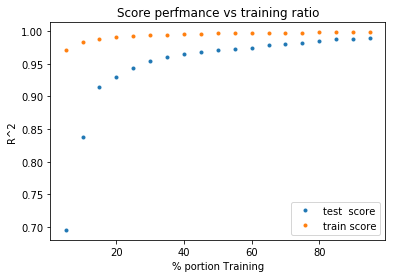

"                                 \nplt.plot(np.transpose(Score)[1],np.transpose(Score)[3],'o',markersize=3,label='test  score')\nplt.plot(np.transpose(Score)[1],np.transpose(Score)[2],'o',markersize=3,label='train score')\nplt.xlabel('% portion Testing')\nplt.ylabel('R^2')\nplt.legend()\nplt.show()\n"

In [36]:
#arranging data
actual    =np.transpose(np.stack((nl_train, nl_test, x_tr, x_te)))
Predicted =np.transpose(np.stack((nl_train, nl_test, pred_tr, pred_te)))

Error     = np.transpose(np.stack((nl_train, nl_test, err_tr, err_te)))


Mean      = np.transpose(np.stack((nl_train, nl_test, nerr_tr, nerr_te)))
Stdev     = np.transpose(np.stack((nl_train, nl_test, sderr_tr, sderr_te)))

                                 
Score     = np.transpose(np.stack((nl_train, nl_test, sco_tr , sco_te)))
Median    = np.transpose(np.stack((nl_train, nl_test, derr_tr, derr_te)))




everything=np.transpose(np.stack((nl_train,
                                  nl_test,
                                  x_tr,
                                  x_te,
                                  pred_tr,
                                  pred_te,
                                  err_tr,
                                  err_te,
                                  nerr_tr, 
                                  nerr_te,
                                  sderr_tr,
                                  sderr_te,
                                  sco_tr, 
                                  sco_te,
                                  derr_tr, 
                                  derr_te, 
                                   )))

"""
plt.plot(np.transpose(Score)[0],np.transpose(Score)[2],'o',markersize=3,label='training  score')
plt.xlabel('% portion Training')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.plot(np.transpose(Score)[1],np.transpose(Score)[3],'o',markersize=3,label='testing  score')
plt.xlabel('% portion Testing')
plt.ylabel('R^2')
plt.legend()
plt.show()
"""
                                 
plt.plot(np.transpose(Score)[0],np.transpose(Score)[3],'o',markersize=3,label='test  score')
plt.plot(np.transpose(Score)[0],np.transpose(Score)[2],'o',markersize=3,label='train score')
plt.title('Score perfmance vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('R^2')
plt.legend()
plt.show()

"""                                 
plt.plot(np.transpose(Score)[1],np.transpose(Score)[3],'o',markersize=3,label='test  score')
plt.plot(np.transpose(Score)[1],np.transpose(Score)[2],'o',markersize=3,label='train score')
plt.xlabel('% portion Testing')
plt.ylabel('R^2')
plt.legend()
plt.show()
"""

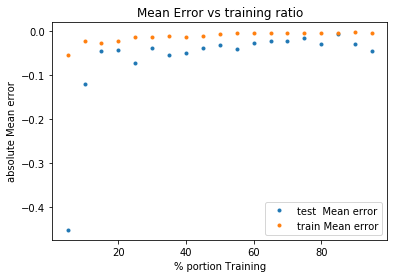

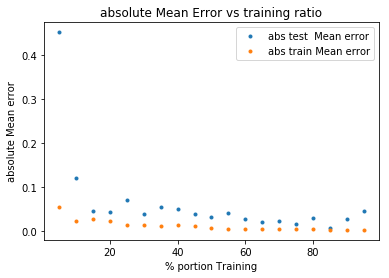

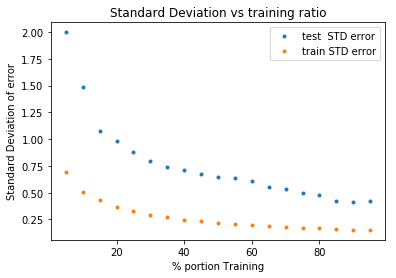

"\nplt.plot(np.transpose(Mean)[1],np.transpose(Mean)[3],'o',markersize=3,label='test  Mean error')\nplt.plot(np.transpose(Mean)[1],np.transpose(Mean)[2],'o',markersize=3,label='train Mean error')\nplt.xlabel('% portion Testing')\nplt.ylabel('Mean error')\nplt.legend()\nplt.show()\n"

In [37]:
"""
plt.plot(np.transpose(Mean)[0],np.transpose(Mean)[2],'o',markersize=3,label='training  Mean error')
plt.xlabel('% portion Training')
plt.ylabel('Mean error')
plt.legend()
plt.show()
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[3],'o',markersize=3,label='testing  Mean error')
plt.xlabel('% portion Testing')
plt.ylabel('Mean error')
plt.legend()
plt.show()
"""
plt.plot(np.transpose(Mean)[0],np.transpose(Mean)[3],'o',markersize=3,label='test  Mean error')
plt.plot(np.transpose(Mean)[0],np.transpose(Mean)[2],'o',markersize=3,label='train Mean error')
plt.title('Mean Error vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('absolute Mean error')
plt.legend()
plt.show()

plt.plot(np.transpose(Mean)[0],abs(np.transpose(Mean)[3]),'o',markersize=3,label='abs test  Mean error')
plt.plot(np.transpose(Mean)[0],abs(np.transpose(Mean)[2]),'o',markersize=3,label='abs train Mean error')
plt.title('absolute Mean Error vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('absolute Mean error')
plt.legend()
plt.show()


plt.plot(np.transpose(Stdev)[0],np.transpose(Stdev)[3],'o',markersize=3,label='test  STD error')
plt.plot(np.transpose(Stdev)[0],np.transpose(Stdev)[2],'o',markersize=3,label='train STD error')
plt.title('Standard Deviation vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('Standard Deviation of error')
plt.legend()
plt.show()

"""
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[3],'o',markersize=3,label='test  Mean error')
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[2],'o',markersize=3,label='train Mean error')
plt.xlabel('% portion Testing')
plt.ylabel('Mean error')
plt.legend()
plt.show()
"""


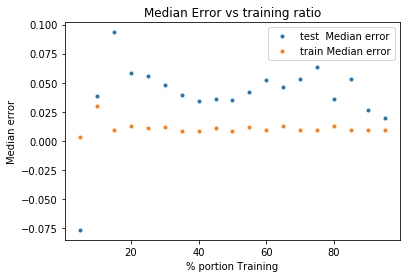

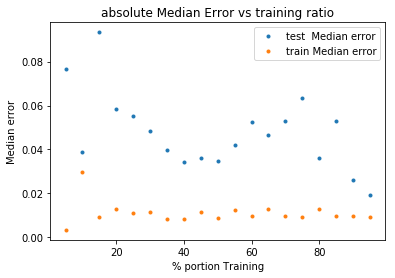

"\nplt.plot(np.transpose(Median)[1],np.transpose(Median)[3],'o',markersize=3,label='test  Median error')\nplt.plot(np.transpose(Median)[1],np.transpose(Median)[2],'o',markersize=3,label='train Median error')\nplt.xlabel('% portion Testing')\nplt.ylabel('Median error')\nplt.legend()\nplt.show()\n"

In [38]:
"""
plt.plot(np.transpose(Median)[0],np.transpose(Median)[2],'o',markersize=3,label='training  Median error')
plt.xlabel('% portion Training')
plt.ylabel('Median error')
plt.legend()
plt.show()

plt.plot(np.transpose(Median)[1],np.transpose(Median)[3],'o',markersize=3,label='testing  Median error')
plt.xlabel('% portion Testing')
plt.ylabel('Median error')
plt.legend()
plt.show()
"""



plt.plot(np.transpose(Median)[0],np.transpose(Median)[3],'o',markersize=3,label='test  Median error')
plt.plot(np.transpose(Median)[0],np.transpose(Median)[2],'o',markersize=3,label='train Median error')
plt.title('Median Error vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('Median error')
plt.legend()
plt.show()


plt.plot(np.transpose(Median)[0],abs(np.transpose(Median)[3]),'o',markersize=3,label='test  Median error')
plt.plot(np.transpose(Median)[0],abs(np.transpose(Median)[2]),'o',markersize=3,label='train Median error')
plt.title('absolute Median Error vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('Median error')
plt.legend()
plt.show()

"""
plt.plot(np.transpose(Median)[1],np.transpose(Median)[3],'o',markersize=3,label='test  Median error')
plt.plot(np.transpose(Median)[1],np.transpose(Median)[2],'o',markersize=3,label='train Median error')
plt.xlabel('% portion Testing')
plt.ylabel('Median error')
plt.legend()
plt.show()
"""


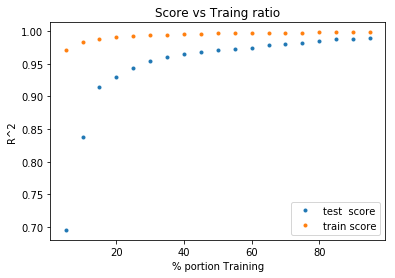

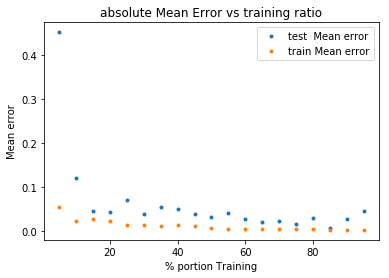

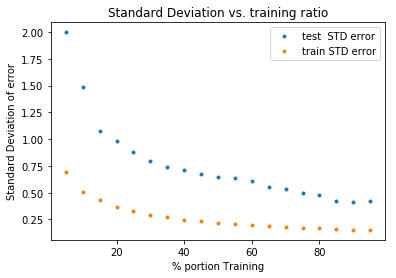

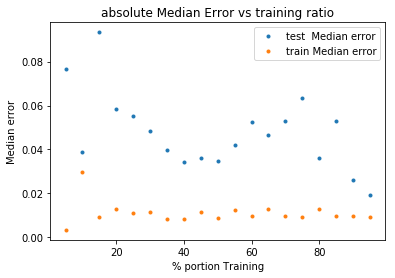

In [39]:
#Score plot
plt.plot(np.transpose(Score)[0],np.transpose(Score)[3],'o',markersize=3,label='test  score')
plt.plot(np.transpose(Score)[0],np.transpose(Score)[2],'o',markersize=3,label='train score')
plt.title('Score vs Traing ratio')
plt.xlabel('% portion Training')
plt.ylabel('R^2')
plt.legend()
plt.show()

#mean plot
plt.plot(abs(np.transpose(Mean)[0]),abs(np.transpose(Mean)[3]),'o',markersize=3,label='test  Mean error')
plt.plot(abs(np.transpose(Mean)[0]),abs(np.transpose(Mean)[2]),'o',markersize=3,label='train Mean error')
plt.title('absolute Mean Error vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('Mean error')
plt.legend()
plt.show()

#Standard Deviation Plot
plt.plot(np.transpose(Stdev)[0],np.transpose(Stdev)[3],'o',markersize=3,label='test  STD error')
plt.plot(np.transpose(Stdev)[0],np.transpose(Stdev)[2],'o',markersize=3,label='train STD error')
plt.title('Standard Deviation vs. training ratio')
plt.xlabel('% portion Training')
plt.ylabel('Standard Deviation of error')
plt.legend()
plt.show()

#Median error plot
plt.plot(abs(np.transpose(Median)[0]),abs(np.transpose(Median)[3]),'o',markersize=3,label='test  Median error')
plt.plot(abs(np.transpose(Median)[0]),abs(np.transpose(Median)[2]),'o',markersize=3,label='train Median error')
plt.title('absolute Median Error vs training ratio')
plt.xlabel('% portion Training')
plt.ylabel('Median error')
plt.legend()
plt.show()


 # Variance

Keeping train test data set ration to 75% train. but making the random forest and split different every itteration to observe variance.

In [34]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=1000)# , random_state=42)

In [56]:
it         =[]#itteration

vx_tr      =[] #actual 
vx_te      =[]

vpred_tr   =[] #predicted
vpred_te   =[]

verr_tr    =[] #error
verr_te    =[]


vnoerr_tr  =[] #error
vnoerr_te  =[]

vsco_tr    =[] #score
vsco_te    =[]

vnerr_tr   =[] #mean of error
vnerr_te   =[]

vsderr_tr  =[] #standard Deviation of error
vsderr_te  =[]

vderr_tr   =[] #median of error
vderr_te   =[]

#loop to see how different train/test ratios effects bias and variance going from test data set of 5% to 95%
for n in range(1, 101):
    
    #Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25)# , random_state=42 )
    
    #fitting the rf to the training values
    rf.fit(X_train, y_train);
    it.append(n)
     
    
    
    #appending the ACTUAL values into a list
    vx_tr.append(X_train)
    vx_te.append(X_test )
    
    ###########
    
    pred_train= rf.predict(X_train)
    pred_test = rf.predict(X_test )
    
    #appending the PREDICTED values of rf into a list
    vpred_tr.append(pred_train)
    vpred_te.append(pred_test)
    
    ###########
    
    #all error values
    err_train = y_train-pred_train
    err_test  = y_test- pred_test 
    
    #appending the ERROR values to list
    verr_tr.append(err_train)
    verr_te.append(err_test)
    
    ###########
    
    #appending the SCORES to the scores lists
    vsco_tr.append(rf.score(X_train, y_train))
    vsco_te.append(rf.score(X_test,  y_test ))
    
    ###########
    
    #appending the MEAN of the error vaues
    vnerr_tr.append(np.mean(err_train))
    vnerr_te.append(np.mean(err_test ))
    
    ###########
    
    #appending the STANDARD DEVIATION of the error values
    vsderr_tr.append(np.std(err_train))
    vsderr_te.append(np.std(err_test ))
    
    ###########
    
    #appending the MEDIAN of the error values
    vderr_tr.append(np.median(err_train))
    vderr_te.append(np.median(err_test ))
    
    
    #Printing all the values:
    """
    #ratios
    print('iteration: ', n)
    
    #scores
    #print('train score: ', round(rf.score(X_train, y_train),5))
    #print('test  score: ', round(rf.score(X_test,  y_test ),5))
    
    #mean error
    print('mean error of train:', round(np.mean(err_train),5))
    print('mean error of test: ', round(np.mean(err_test),5))
    
    
    #standard Deviatin of error
    print('Standard Deviation error of train:', round(np.std(err_train),5))
    print('Standard Deviation of test: ',       round(np.std(err_test ),5))
    
    #median error
    print('median error of train:', round(np.median(err_train),5))
    print('median error of test: ', round(np.median(err_test),5))
    """
    

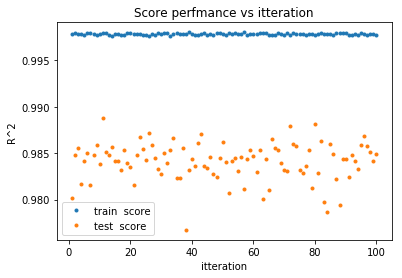

Standard Deviation of train score: 8.909272526939052e-05
Standard Deviation of test  score: 0.002021946940493333


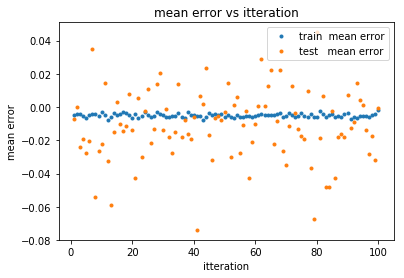

Standard Deviation of train mean error: 0.0011017269319500097
Standard Deviation of test  mean error: 0.020862695513193776


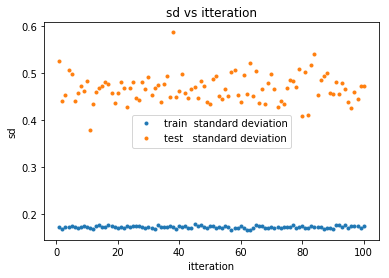

Standard Deviation of train standard deviation: 0.0025299986268757946
Standard Deviation of test  standard deviation: 0.029075842254302767


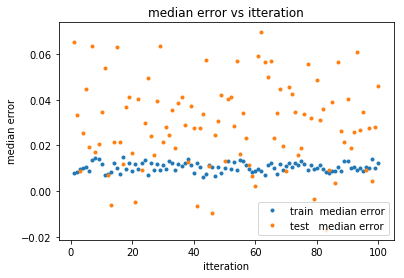

Standard Deviation of train median error: 0.001976985768504543
Standard Deviation of test  median error: 0.01855330539936584


In [60]:
plt.plot(it, vsco_tr,'o',markersize=3,label='train  score')
plt.plot(it, vsco_te,'o',markersize=3,label='test  score')
plt.title('Score perfmance vs itteration')
plt.xlabel('itteration')
plt.ylabel('R^2')
plt.legend()
plt.show()
print('Standard Deviation of train score:', np.std(vsco_tr))
print('Standard Deviation of test  score:', np.std(vsco_te))


plt.plot(it, vnerr_tr,'o',markersize=3,label='train  mean error')
plt.plot(it, vnerr_te,'o',markersize=3,label='test   mean error')
plt.title('mean error vs itteration')
plt.xlabel('itteration')
plt.ylabel('mean error')
plt.legend()
plt.show()
print('Standard Deviation of train mean error:', np.std(vnerr_tr))
print('Standard Deviation of test  mean error:', np.std(vnerr_te))

                                                   
plt.plot(it, vsderr_tr,'o',markersize=3,label='train  standard deviation')
plt.plot(it, vsderr_te,'o',markersize=3,label='test   standard deviation')
plt.title('sd vs itteration')
plt.xlabel('itteration')
plt.ylabel('sd')
plt.legend()
plt.show()
print('Standard Deviation of train standard deviation:', np.std(vsderr_tr))
print('Standard Deviation of test  standard deviation:', np.std(vsderr_te))


plt.plot(it, vderr_tr,'o',markersize=3,label='train  median error')
plt.plot(it, vderr_te,'o',markersize=3,label='test   median error')
plt.title('median error vs itteration')
plt.xlabel('itteration')
plt.ylabel('median error')
plt.legend()
plt.show()
print('Standard Deviation of train median error:', np.std(vderr_tr))
print('Standard Deviation of test  median error:', np.std(vderr_te))



In [61]:
def binde(z,n):
    a=z+n
    p1=  15.76*(a)
    p2=  -17.81*(a**(2./3.))
    p3=  -0.711 * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(z%2==0 and n%2==0):
        p5=34.*(a**(-3./4.))
        
    elif(z%2==1 and n%2==1):
        p5=-34.*(a**(-3./4.))
        
    else: 
        p5=0
        
    be=p1+p2+p3+p4+p5
    return be


In [129]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =25/100, random_state=42 )
    
#fitting the rf to the training values
rf.fit(X_train, y_train);

#print(rf.get_params(), '\n')
#print(rf.decision_path(X_train))

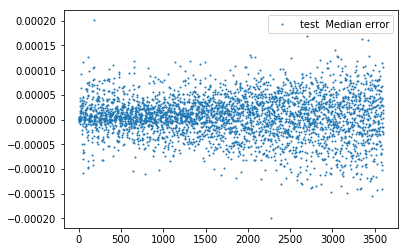

In [64]:
nlist=[]
zlist=[]
bel=[]


N = np.genfromtxt('check_py_ldm.dat',usecols=1) #Number of neutrons
Z = np.genfromtxt('check_py_ldm.dat',usecols=0) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('check_py_ldm.dat',usecols=2)
X = np.transpose(np.stack((Z, N, y)))

for n in range(1, 61):
    for z in range(1,61):
        nlist.append(n)
        zlist.append(z)
        bel.append(binde(z,n))
        

beli= np.transpose(np.stack( (zlist, nlist, bel)))

#print(beli, '\n')
#print(X)

#print(y-bel, '\n')

plt.plot(range(1,3601),y-bel,'o',markersize=1,label='test  Median error')
plt.legend()
plt.show()

In [102]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=1000)# , random_state=42)

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42 )
    
#fitting the rf to the training values
rf.fit(X_train, y_train);
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))



0.9999445818226228
0.9992875444606333


'\nprint(np.shape(X_train))\nprint(X_train)\n\n\n\nX = np.transpose(np.stack((N,Z)))\n\nprint(X)\nprint(np.shape(X))\nprint(np.shape(np.array([[20,20]])))\n\n\nX_this=np.transpose(np.stack(1.,1.))\nprint(rf.predict(X_this))\nprint(rf.predict(X_test))\n'

n= 1
    z= 0
    z= 1
    z= 2


n= 2
    z= 0
    z= 1
    z= 2


n= 3
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4


n= 4
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6


n= 5
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6


n= 6
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8


n= 7
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8


n= 8
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8
    z= 9
    z= 10


n= 9
    z= 0
    z= 1
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8
    z= 9
    z= 10
    z= 11
    z= 12


n= 10
    z= 2
    z= 3
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8
    z= 9
    z= 10
    z= 11
    z= 12
    z= 13
    z= 14


n= 11
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8
    z= 9
    z= 10
    z= 11
    z= 12
    z= 13
    z= 14


n= 12
    z= 4
    z= 5
    z= 6
    z= 7
    z= 8
    z= 9
    z= 10
    z= 11
    z= 1

    z= 50
    z= 51
    z= 52
    z= 53
    z= 54
    z= 55
    z= 56
    z= 57
    z= 58


n= 71
    z= 48
    z= 49
    z= 50
    z= 51
    z= 52
    z= 53
    z= 54
    z= 55
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62


n= 72
    z= 52
    z= 53
    z= 54
    z= 55
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62
    z= 63
    z= 64


n= 73
    z= 54
    z= 55
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62
    z= 63
    z= 64


n= 74
    z= 54
    z= 55
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62
    z= 63
    z= 64


n= 75
    z= 54
    z= 55
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62
    z= 63
    z= 64
    z= 65
    z= 66


n= 76
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62
    z= 63
    z= 64
    z= 65
    z= 66


n= 77
    z= 56
    z= 57
    z= 58
    z= 59
    z= 60
    z= 61
    z= 62
    z= 63
    z= 64
    z= 65
    z= 66


n=

    z= 91
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100


n= 137
    z= 90
    z= 91
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100


n= 138
    z= 90
    z= 91
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100


n= 139
    z= 90
    z= 91
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100
    z= 101
    z= 102


n= 140
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100
    z= 101
    z= 102


n= 141
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100
    z= 101
    z= 102


n= 142
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100
    z= 101
    z= 102


n= 143
    z= 92
    z= 93
    z= 94
    z= 95
    z= 96
    z= 97
    z= 98
    z= 99
    z= 100
    z= 101
    z= 102
    z= 103
    z= 104


n= 14

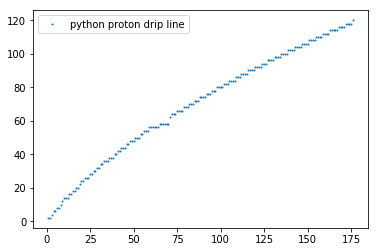

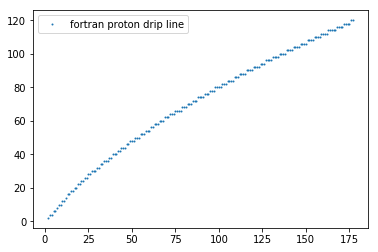

In [105]:

zdrip=[]
ndep=[]
zdripndep=[]
initialz=0
finalz=177

forndep  = np.genfromtxt('zdrip.dat',usecols=0) 
forzdrip = np.genfromtxt('zdrip.dat',usecols=1)
forzdripndep = np.transpose(np.stack((forndep,forzdrip )))


for n in range(1, 177):
    print('n=', n)
    for z in range(initialz, finalz):
        
        befirst=binde(z,n)   + rf.predict(   np.array(  [ [n,z  ] ]  )   )
        besecond=binde(z+1,n)+ rf.predict(   np.array(  [ [n,z+1] ]  )   )
        separationE=besecond-befirst 
        
        print('    z=', z)
        if separationE<=0: #and besecond>=0 and befirst>=0:
            ndep.append(n)
            zdrip.append(z)
            finalz=z+20
            if z>=10:
                initialz=z-10
            else:
                initialz=0   
            break
    print('\n')

            
            
zdripndep = np.transpose(np.stack((ndep,zdrip )))
print(np.shape(zdripndep))
print(np.shape(forzdripndep))
diff=zdrip-forzdrip

print(diff)



plt.plot(ndep,zdrip,'o',markersize=1,label='python proton drip line')
#plt.plot(forndep, forzdrip,'o',markersize=1,label='fortran proton drip line')
plt.legend()
plt.show()

#plt.plot(ndep,zdrip,'o',markersize=1,label='python proton drip line')
plt.plot(forndep, forzdrip,'o',markersize=1,label='fortran proton drip line')
plt.legend()
plt.show()



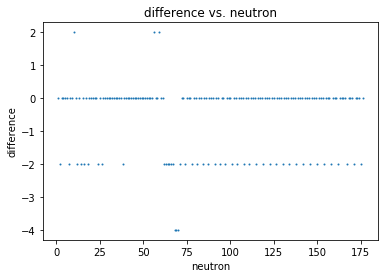

In [109]:
plt.plot(ndep,diff,'o',markersize=1)#,label='difference')
#plt.plot(forndep, forzdrip,'o',markersize=1,label='fortran proton drip line')
plt.title('difference vs. neutron')
plt.xlabel('neutron')
plt.ylabel('difference')
plt.show()

In [128]:

ndrip=[]
zdep=[]
ndripzdep=[]
initialn=0
finaln=177

forzdep  = np.genfromtxt('ndrip.dat',usecols=1) 
forndrip = np.genfromtxt('ndrip.dat',usecols=0)
forndripzdep = np.transpose(np.stack((forzdep,forndrip )))
 

for z in range(1, 121):
    for n in range(initialn, finaln):
        befirst=binde(z,n)+ rf.predict(   np.array(  [ [n,z  ] ]  )   )
        besecond=binde(z,n+1)+ rf.predict(   np.array(  [ [n+1,z  ] ]  )   )
        separationE=besecond-befirst
        
        #print('n: ', n, 'z:', z)
        #print('initialz:', initialz)
        #print('finalz:', finalz)
        #print('first: ', befirst)
        #print('second: ', besecond)
        #print('separation: ', separationE, '\n')
        
        if separationE<=0:# and besecond>=0 and befirst>=0:
            
            #print('IF STATEMENT ACTIVATED !!!!!!!!!!!')
            zdep.append(z)
            ndrip.append(n)
            finaln=n+20
            if n>=10:
                initialn=n-10
            else:
                initialn=0   
            break
      
    
  

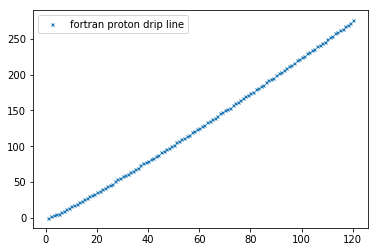

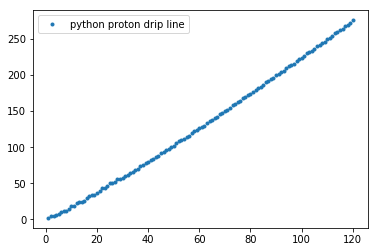

No handles with labels found to put in legend.


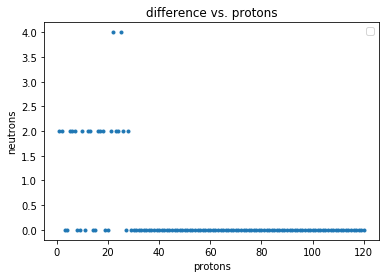

In [127]:
ndripzdep = np.transpose(np.stack((zdep,ndrip )))
    
    
difference=ndrip-forndrip
#print(ndrip, '\n')
#print(forndrip, '\n')
#print(difference)
#print(np.shape(difference))
#print(np.shape(ndripzdep))
#print(np.shape(forndripzdep))



plt.plot(forzdep, forndrip,'x',  markersize=3, label= 'fortran proton drip line')
plt.legend()
plt.show()

plt.plot(zdep,ndrip,       'o',  markersize=3, label= 'python proton drip line')
plt.legend()
plt.show()

plt.plot(zdep,difference,  'o',  markersize=3, label= '')
plt.title('difference vs. protons')
plt.xlabel('protons')
plt.ylabel('neutrons')
plt.legend()
plt.show()